# **Графические возможности библиотеки Seaborn**

##### **НЕМНОГО О БИБЛИОТЕКЕ**
***

[Seaborn](http://seaborn.pydata.org/index.html) — надстройка над библиотекой Matplotlib, которая значительно расширяет её возможности, позволяя создавать графики более высокого уровня с эстетичным оформлением. Библиотека предоставляет большое количество дополнительных опций для творчества при визуализации данных

Установка библиотеки через терминал:

*pip install seaborn*

Традиционно Seaborn импортируется под псевдонимом sns:

*import seaborn as sns  
print(sns.__version__)*
***

In [5]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
covid_df = pd.read_csv('data/covid_merged.csv', sep=';')
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [3]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom'] # список нужных стран
croped_covid_df = covid_df[covid_df['country'].isin(countries)] # забираем из таблицы все данные по странам из списка

populations = pd.DataFrame([ # создаём датафрейм с населением наших стран
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country']) # присоединяем к таблице с данными по нужным странам инфу об их населении
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100 # находим ежедневную долю заболевших от общего числа населения
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


**ГИСТОГРАММА**
***

Для визуализации гистограмм в библиотеке Seaborn используется метод 

[**histplot()**](https://seaborn.pydata.org/generated/seaborn.histplot.html)

Основные параметры почти всех графиков в сиборне:

* data — DataFrame, по которому строится график;
* x — признак, который будет отложен по оси абсцисс;
* y — признак, который будет отложен по оси ординат;
* hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
* ax — система координат Matplotlib, в которой строится график;
* color — цвет графика;

Основные параметры метода histplot():

* bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
* kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

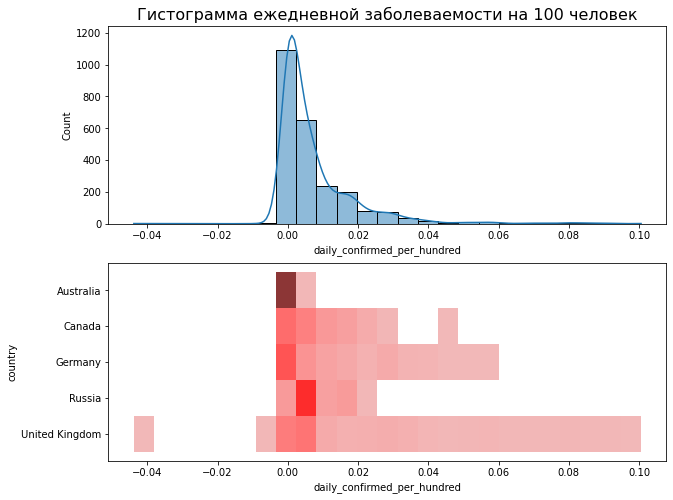

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8)) # создаём плоскость с двумя рядами графиков
sns.histplot(
    data=croped_covid_df, 
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,  # строим кривую сглаживания
    ax=axes[0]  # первый ряд
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country', # благодаря этой строчке график выводит данные по яркости цвета в ячейке
    bins=25,
    color='red',
    ax=axes[1]  # второй ряд
);

Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0. 

Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

**КОРОБЧАТАЯ ДИАГРАММА**
***

Коробчатые диаграммы в Seaborn строятся с помощью метода
[**boxplot()**](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

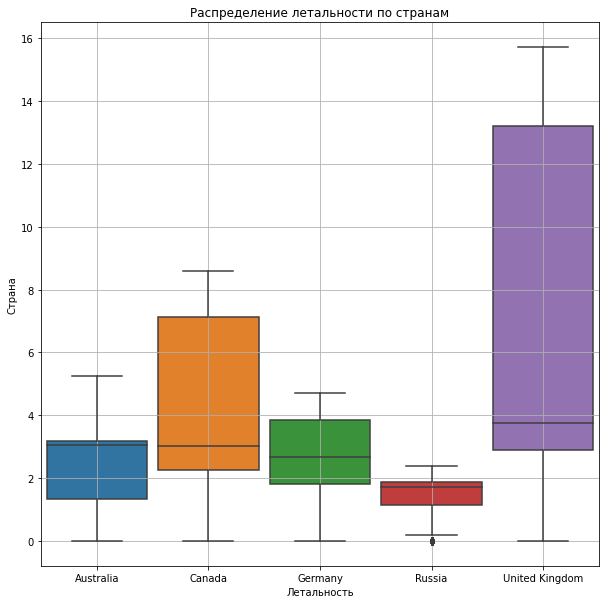

In [18]:
fig = plt.figure(figsize=(10, 10))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='death_rate',
    orient='v', # параметр orient отвечает за ориентацию графика h - горизонтальная, v - вертикальная
    width=0.9 # ширина коробок
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

**МНОГОУРОВНЕВАЯ СТОЛБЧАТАЯ ДИАГРАММА**
***

С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в Seaborn используется метод 

[**barplot()**](https://seaborn.pydata.org/generated/seaborn.barplot.html)

По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре *estimator*). Для добавления многоуровневости используется параметр *hue*, который позволяет группировать данные по признаку:


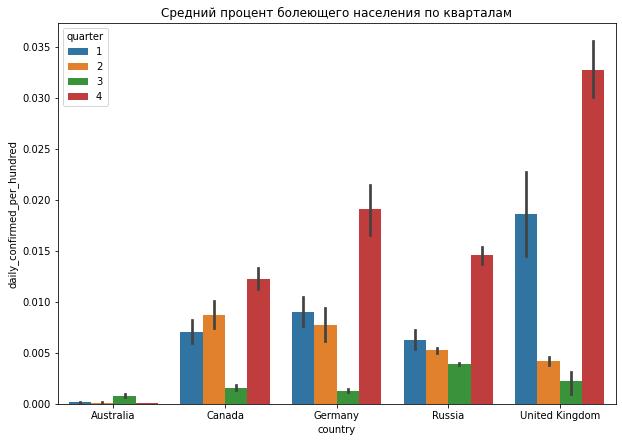

In [21]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = pd.to_datetime(croped_covid_df['date']).dt.quarter # создаём новый столбец в таблице с 5 странами с нвомером квартала года
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter', # признак для создания неск графиков по одним и тем же данным
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

**JOINPLOT**
***

Построим один из самых любимых дата-сайентистами графиков — [**jointplot()**](https://seaborn.pydata.org/generated/seaborn.jointplot.html) — в котором совмещены диаграмма рассеяния и гистограмма. Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.



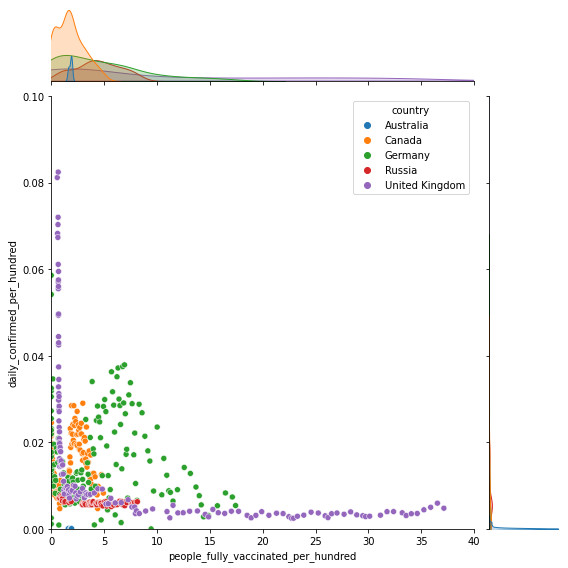

In [22]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', # доля полностью вакцинированных от населения
    y='daily_confirmed_per_hundred', # доля заболевших от населения
    hue='country', # признак для создания неск графиков по одним и тем же данным
    xlim = (0, 40), # диапазон (ОДЗ) по оси икс
    ylim = (0, 0.1), # диапазон (ОДЗ) по оси игрик
    height=8, # ширина и высота графика (сторона квадрата)
)

Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

**ТЕПЛОВАЯ КАРТА**
***

Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Для построения тепловой карты в Seaborn используется метод 

[**heatmap()**](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью [**цвета**](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

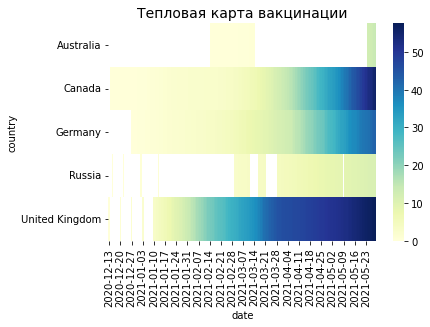

In [29]:
pivot = croped_covid_df.pivot_table( # сводная таблица (строки: страны, столбцы: даты, значения: доля вакцинированных)
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string') # не забыть переводить дату в нахваниях столбцов в стринг

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', annot = False) # annot - вкл аннотацию, cmap - цветовая схема градиента
heatmap.set_title('Тепловая карта вакцинации', fontsize=14); # 